<a href="https://colab.research.google.com/github/yaobviously/PyMC3threes/blob/main/threes_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install arviz==0.6.1
!pip install pymc3==3.8
!pip install Theano==1.0.4

import pymc3 as pm
import arviz as az
import theano as tt
import pandas as pd
import numpy as np
threes_data_url = r'https://github.com/yaobviously/PyMC3threes/raw/main/threesmodel_small.csv'

     |████████████████████████████████| 1.4MB 5.2MB/s 
     |████████████████████████████████| 4.7MB 18.8MB/s 
     |████████████████████████████████| 317kB 35.6MB/s 
     |████████████████████████████████| 911kB 4.5MB/s 
  Found existing installation: pymc3 3.7
    Uninstalling pymc3-3.7:
      Successfully uninstalled pymc3-3.7
     |████████████████████████████████| 2.8MB 5.2MB/s 
  Created wheel for Theano: filename=Theano-1.0.4-cp37-none-any.whl size=2667178 sha256=01b6f9f50b1c5bd30b9c66694ffb941be55688fcdcfa6cdf3a25dc656a94ad70
  Stored in directory: /root/.cache/pip/wheels/88/fb/be/483910ff7e9f703f30a10605ad7605f3316493875c86637014
Successfully built Theano
  Found existing installation: Theano 1.0.5
    Uninstalling Theano-1.0.5:
      Successfully uninstalled Theano-1.0.5


In [4]:
threes_data = pd.read_csv(threes_data_url)
threes_data['GMMlabel'] = threes_data['GMMlabel'].astype('category')
players = threes_data['Player']
gmm_cat = threes_data['GMMlabel']         
threes_att = np.array(threes_data['3PA_x']).T
threes_made = np.array(threes_data['3P_x']).T

sample_size = len(threes_att)

In [5]:
sample_size

30

In [ ]:
# Specifying the model

with pm.Model() as threes_model:

# This line specifies a uniform distribution over the prior probability of the
# sample's mean three point percentage

  phi = pm.Uniform('phi', lower = 0.0, upper = 1.0)
 
# These lines specify an exponential prior over kappa that is transformed
# into kappa.

  kappa_log = pm.Exponential("kappa_log", lam = 1.5)
  kappa = pm.Deterministic("kappa", np.exp(kappa_log))

# Each player gets their own 'theta', or estimated three point percentage. It is drawn
# from a combination specified by phi and kappa.

  thetas = pm.Beta("thetas", alpha = phi * kappa, beta = (1 - phi) * kappa, shape = sample_size)

# This specifies the proximate process generating the observations: the total number 
# of threes made. n = attempts, p = probability of a make.

  y = pm.Binomial("y", n = threes_att, p = thetas, observed = threes_made)


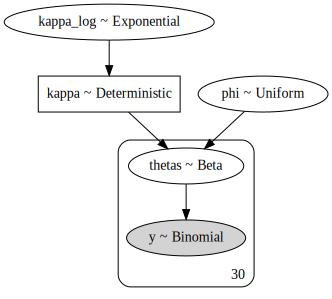

In [ ]:
# This line expresses the above model in plate notation, which allows us to examine
# the structure of the model.

pm.model_to_graphviz(threes_model)

In [ ]:
# Sampling the posterior given our data. It's in a separate cell in case we want
# to revise our model after examining it in plate notation.

with threes_model:
    trace = pm.sample(25000, tune=5000, chains=2)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [thetas, kappa_log, phi]
Sampling chain 1, 1 divergences: 100%|██████████| 30000/30000 [01:08<00:00, 440.25it/s]
There were 6 divergences after tuning. Increase `target_accept` or reparameterize.
There were 7 divergences after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 10% for some parameters.


In [ ]:
df = az.summary(trace)

In [ ]:
az.summary(trace)

/usr/local/lib/python3.7/dist-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/usr/local/lib/python3.7/dist-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/usr/local/lib/python3.7/dist-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/usr/local/lib/python3.7/dist-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8be790d090>,
      dtype=object)

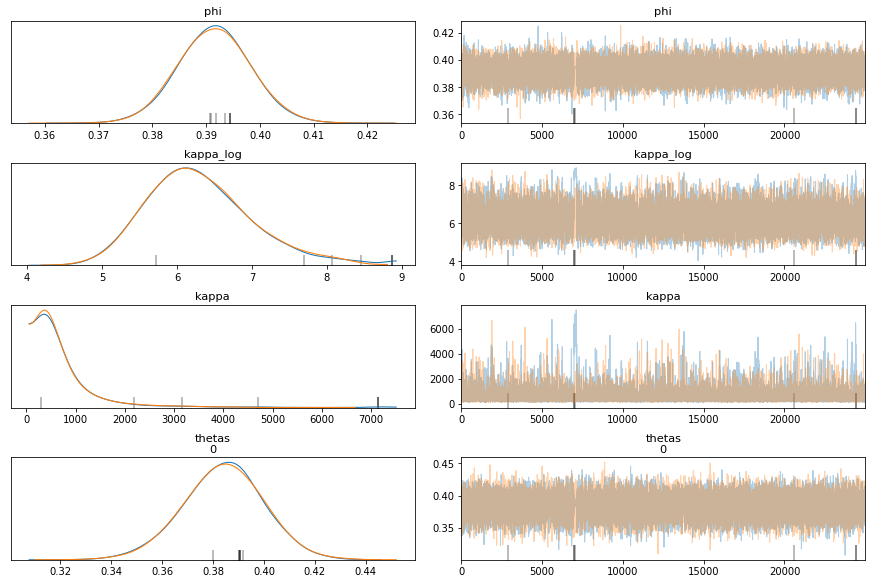

In [ ]:
az.plot_trace(trace)

In [ ]:
df2 = pd.DataFrame(trace.thetas)
df2.columns = players


In [ ]:
df2

Player,Damian Lillard,Buddy Hield,Stephen Curry,Duncan Robinson,Jordan Clarkson,Donovan Mitchell,Fred VanVleet,Zach LaVine,Terry Rozier,Tim Hardaway Jr.,James Harden,Luka Doncic,Gary Trent Jr.,Joe Harris,Anthony Edwards,Lonzo Ball,Trae Young,Justin Holiday,Nikola Vucevic,Malik Beasley,Danny Green,Bojan Bogdanovic,Jamal Murray,Patty Mills,Brandon Ingram,Jayson Tatum,Coby White,Norman Powell,Jaylen Brown,Malcolm Brogdon
0,0.403975,0.418912,0.399429,0.364995,0.393248,0.379199,0.391943,0.396689,0.405743,0.372349,0.397882,0.402367,0.411213,0.468271,0.369683,0.374937,0.380791,0.388876,0.426954,0.418950,0.413594,0.400400,0.408379,0.400812,0.384671,0.378127,0.380334,0.408928,0.393680,0.403212
1,0.410689,0.425962,0.396222,0.370749,0.394112,0.377359,0.395312,0.400950,0.410533,0.390960,0.386777,0.409147,0.423323,0.471043,0.372789,0.389516,0.381249,0.387086,0.413207,0.424311,0.405488,0.391086,0.414745,0.400339,0.389975,0.365413,0.377065,0.409595,0.402596,0.394471
2,0.400902,0.394870,0.417591,0.367944,0.384696,0.374516,0.375097,0.388128,0.393355,0.411612,0.435348,0.405002,0.403370,0.460516,0.390352,0.397063,0.352660,0.377917,0.409330,0.423698,0.412753,0.407151,0.413772,0.377141,0.383803,0.392245,0.353817,0.409997,0.403432,0.398256
3,0.400059,0.413668,0.405433,0.363458,0.387610,0.376409,0.372861,0.388287,0.399635,0.415045,0.428074,0.397394,0.401428,0.440842,0.386834,0.386553,0.352015,0.358973,0.409678,0.419101,0.381393,0.386592,0.416825,0.383912,0.383611,0.384051,0.348057,0.427478,0.438408,0.390302
4,0.404886,0.385241,0.375279,0.378156,0.350158,0.382990,0.369513,0.434779,0.449834,0.408781,0.392569,0.394424,0.408537,0.477602,0.346832,0.389761,0.379783,0.373375,0.391746,0.389968,0.384382,0.401150,0.383398,0.388080,0.370164,0.362770,0.343373,0.452001,0.377451,0.382117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0.397115,0.397382,0.377781,0.395571,0.358989,0.390041,0.393139,0.407754,0.396494,0.404255,0.357653,0.378374,0.371669,0.432531,0.357580,0.391892,0.368851,0.379661,0.380781,0.407311,0.400472,0.401838,0.412147,0.404075,0.404555,0.388025,0.408453,0.401917,0.389523,0.389300
49996,0.392580,0.378642,0.406418,0.409308,0.384670,0.390788,0.390804,0.394758,0.393087,0.420210,0.389774,0.397897,0.391735,0.443865,0.384828,0.410210,0.379724,0.401485,0.397826,0.391408,0.362157,0.365300,0.380482,0.420338,0.382117,0.394761,0.388589,0.391075,0.389464,0.390684
49997,0.404662,0.396919,0.401981,0.389040,0.391255,0.435166,0.386771,0.450039,0.413685,0.428959,0.389941,0.395221,0.396403,0.409092,0.349999,0.382416,0.374307,0.391905,0.381275,0.393832,0.405131,0.405849,0.441204,0.396249,0.384028,0.400589,0.373298,0.433177,0.395054,0.383841
49998,0.392743,0.375474,0.402701,0.375484,0.370153,0.420898,0.388427,0.432218,0.419707,0.419358,0.377449,0.371066,0.377968,0.395672,0.358433,0.366535,0.369137,0.415042,0.376215,0.399330,0.389541,0.417030,0.429856,0.420764,0.388957,0.389672,0.385345,0.447643,0.389878,0.393749


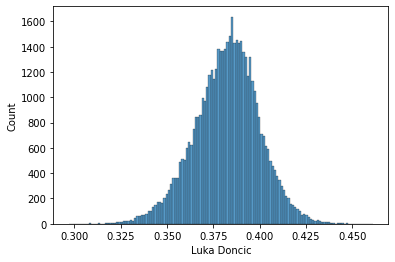

In [ ]:
sns.histplot(df2['Luka Doncic'])